In [1]:
import pandas as pd
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

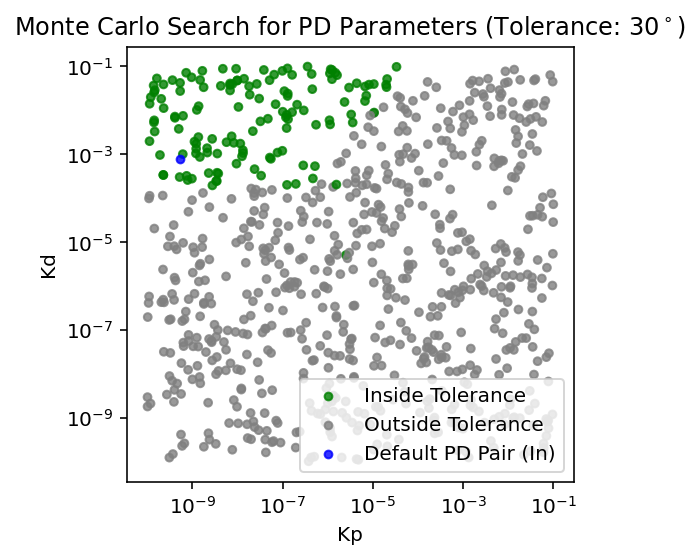

In [2]:
data = pd.read_csv("mc")
error= data.iloc[:,0]
Kp = data.iloc[:,1]
Kd = data.iloc[:,2]

# From Matlab #
#5.25063e-10 ,0.000793528#
error_default = 166.48
Kp_default =5.25063e-10
Kd_default = 0.000793528
###############

#[0,90]
converge_tor =30

# Define the color based on the range of the first column
color = []

def within_cov_tor(err):
    if err<=converge_tor or err>=(180-converge_tor):
        return True
    else:
        return False

for e in error:
    if within_cov_tor(e):
        color.append("green")
    else:
        color.append('gray')

%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(4, 4))  

plt.scatter(Kp,Kd,c=color,s=15, alpha=0.8)
plt.scatter(0,0,color='green',s=15, alpha=0.8,label="Inside Tolerance")
plt.scatter(0,0,color='gray',s=15, alpha=0.8,label="Outside Tolerance")

plt.scatter(Kp_default,Kd_default,color='blue' if within_cov_tor(error_default) else 'red',s=15, alpha=0.8,label=('Default PD Pair (In)' if within_cov_tor(error_default) else 'Default PD Pair (Out)'))


plt.xscale("log")
plt.yscale("log")

plt.title("Monte Carlo Search for PD Parameters (Tolerance: $"+str(converge_tor)+"^\circ$)")
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()

# Set the limits to be the same for both axes
plt.xlim(min(xmin, ymin), max(xmax, ymax))
plt.ylim(min(xmin, ymin), max(xmax, ymax))

plt.xlabel("Kp")
plt.ylabel("Kd")
plt.legend(loc="lower right")

plt.show()



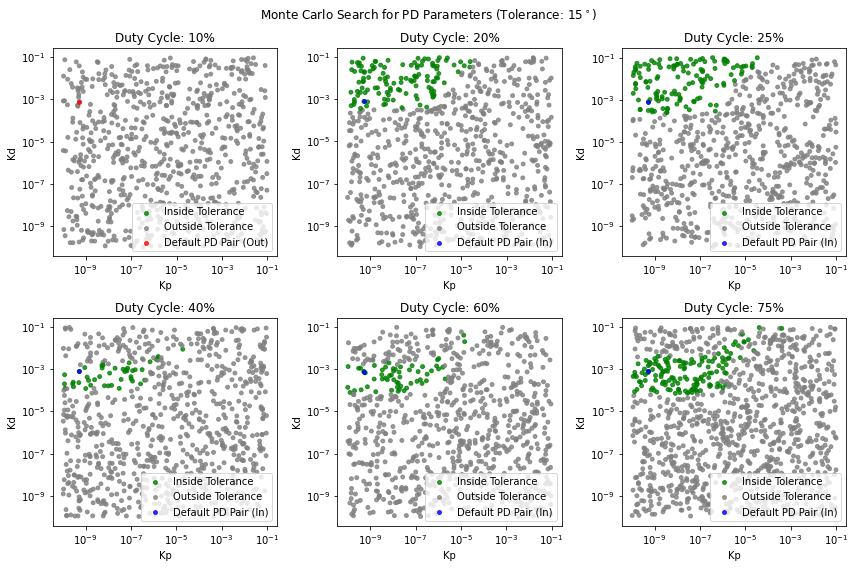

In [20]:
# Define your files
files = ["mc_duty_40_0.1","mc_duty_40_0.2", "mc_duty_40_0.25", "mc_duty_40_0.4", "mc_duty_40_0.6", "mc_duty_40_0.75"]
duty = ["10%","20%", "25%", "40%", "60%", "75%"]

# From Matlab #
#5.25063e-10 ,0.000793528#
# error_default = 166.48
Kp_default =5.25063e-10
Kd_default = 0.000793528
###############

#[0,90]
converge_tor =15

# %config InlineBackend.figure_format = 'retina'

# Create a grid of plots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i, file in enumerate(files):
    data = pd.read_csv(file,header=None)
    error= data.iloc[:,0]
    Kp = data.iloc[:,1]
    Kd = data.iloc[:,2]

    # Define the color based on the range of the first column
    color = []

    def within_cov_tor(err):
        if err<=converge_tor or err>=(180-converge_tor):
            return True
        else:
            return False

    for e in error:
        if within_cov_tor(e):
            color.append("green")
        else:
            color.append('gray')

    ax = axs[i//3, i%3]

    ax.scatter(Kp,Kd,c=color,s=15, alpha=0.8)
    ax.scatter(0,0,color='green',s=15, alpha=0.8,label="Inside Tolerance")
    ax.scatter(0,0,color='gray',s=15, alpha=0.8,label="Outside Tolerance")
    ax.scatter(Kp_default,Kd_default,color='blue' if within_cov_tor(error[0]) else 'red',s=15, alpha=0.8,label=('Default PD Pair (In)' if within_cov_tor(error[0]) else 'Default PD Pair (Out)'))

    ax.set_xscale("log")
    ax.set_yscale("log")

    ax.set_title(f"Duty Cycle: {duty[i]}")
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    # Set the limits to be the same for both axes
    ax.set_xlim(min(xmin, ymin), max(xmax, ymax))
    ax.set_ylim(min(xmin, ymin), max(xmax, ymax))

    ax.set_xlabel("Kp")
    ax.set_ylabel("Kd")
    ax.legend(loc="lower right")

#
fig.suptitle("Monte Carlo Search for PD Parameters (Tolerance: $"+str(converge_tor)+"^\circ$)")

plt.tight_layout()
plt.show()



In [ ]:
Kp_choices=[]
Kd_choices=[]

n_choice  = 20
Kp_step  = (1e-7 - 1e-10)/n_choice
Kd_step  = (1e-1 - 1e-3)/n_choice

for i in range(n_choice):
    Kp_choices.append((i+1)*Kp_step)
    Kd_choices.append((i+1)*Kd_step)

Kp_choices=np.concatenate((Kp_choices,np.linspace(0,1,11)))
Kd_choices=np.concatenate((Kd_choices,np.linspace(0,1,11)))

print(Kp_choices)
print(Kd_choices)

In [9]:
controls  = np.zeros((10,2))
controls[:,0] =  np.random.normal(5, 1,10)
controls[:,1] = np.random.normal(10, 2,10)
controls

array([[ 4.25835957,  8.12554522],
       [ 4.99709726,  8.91873231],
       [ 5.74842373, 11.20405999],
       [ 5.33123498,  7.48060495],
       [ 6.17456433,  9.41196347],
       [ 5.68211511, 12.38768013],
       [ 4.7620348 , 10.58678675],
       [ 5.45576375,  9.72333176],
       [ 8.08861114,  7.68615786],
       [ 5.42160363,  4.7761053 ]])

Sampled pairs:
(6.891571047425826e-05, 18.35401657089816)
(2.0993900826718535e-05, 4.725419237611629)
(5.5379660917862904e-05, 10.323614959119757)
(1.446570629037145e-05, 3.3118094714554074)
(4.442116729132309e-05, 1.056062721662381)
(1.8765976093657613e-05, 9.79223692604788)
(1.828957659750181e-05, 67.3789802176948)
(2.6745672609800713e-06, 3.1784664623703747)
(5.579589315321146e-06, 51.294024623394336)
(0.0001245193236717897, 35.521545003748905)
(3.924341270296305e-05, 13.284595946020845)
(3.9686077153785164e-05, 4.369109166087156)
(3.3033012885805367e-06, 4.192640272919506)
(2.9694374205603272e-05, 1.180265964747403)
(2.2913896758604145e-06, 59.34952558835707)
(4.451676933130874e-06, 2.0976537058566627)
(5.9795237766229034e-05, 5.025963229279083)
(1.4604287647791174e-05, 24.865941447577697)
(0.00019553159690699064, 17.84893179354023)
(4.446246957518959e-06, 35.45251360953258)
(3.061479284017103e-05, 8.659372369909256)
(5.0864466982742175e-06, 90.34175624942763)
(3.896705840868424e-0

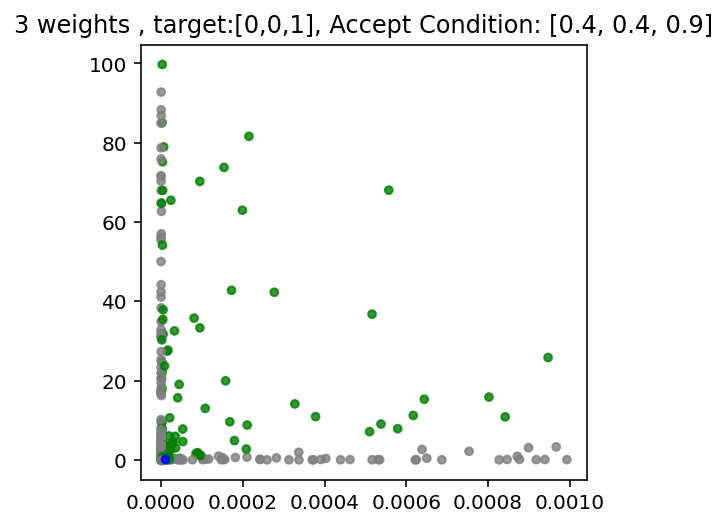

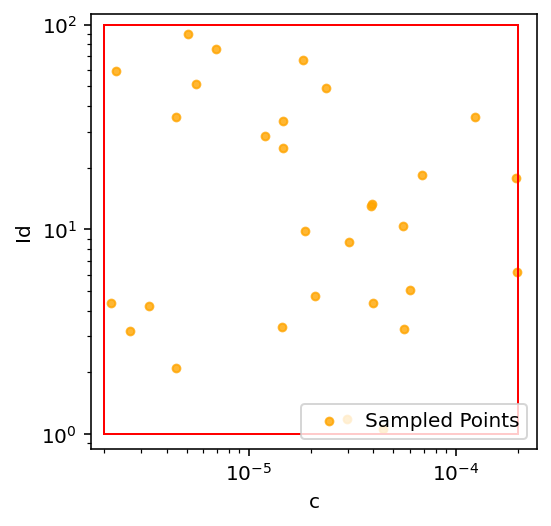

In [2]:
data = pd.read_csv("dooropen/mc_detumble_wz1_3openI_2hr.txt",header=None)
wx = data.iloc[:,0]
wy = data.iloc[:,1]
wz = data.iloc[:,2]
c  =  data.iloc[:,3]
Id  =  data.iloc[:,4]
###############

#[0,90]
wx_tor =0.4
wy_tor =0.4
wz_tor =0.9


# Define the color based on the range of the first column
color = []
# 
def within_cov_tor(wx, wy, wz):
    if abs(float(wx))<=wx_tor and abs(float(wy))<=wy_tor and float(wz)>=wz_tor:
        return True
    else:
        return False

for i in range(len(data)):
    if within_cov_tor(wx[i],wy[i],wz[i]):
        color.append("green")
    else:
        color.append('gray')

%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(4, 4))

plt.scatter(c,Id,c=color,s=15, alpha=0.8)
plt.scatter(0,0,color='green',s=15, alpha=0.8,label="Accept")
plt.scatter(0,0,color='gray',s=15, alpha=0.8,label="Reject")

plt.scatter(c[0],Id[0],color='blue' if within_cov_tor(wx[0],wy[0],wz[0]) else 'red',s=15, alpha=0.8,label=('Default Pair (In)' if within_cov_tor(wx[0],wy[0],wz[0]) else 'Default Pair (Out)'))


plt.title("3 weights , target:[0,0,1], Accept Condition: [" +str(wx_tor)+", "+str(wy_tor)+", "+ str(wz_tor)+"]")


points = [
    (2e-6, 1),  # Bottom left
    (2e-4, 1),  # Bottom right
    (2e-4, 100),  # Top right
    (2e-6, 100)  # Top left
]

# Calculate the bottom left corner and the width and height of the rectangle
# For log scale, use the min and max directly
bottom_left_x = min(points, key=lambda t: t[0])[0]
bottom_left_y = min(points, key=lambda t: t[1])[1]
top_right_x = max(points, key=lambda t: t[0])[0]
top_right_y = max(points, key=lambda t: t[1])[1]
width = top_right_x - bottom_left_x
height = top_right_y - bottom_left_y

# Create the rectangle patch
rect = patches.Rectangle((bottom_left_x, bottom_left_y), width, height, linewidth=1, edgecolor='r', facecolor='none')

plt.xscale("log")
plt.yscale("log")
# Add the rectangle to the plot
plt.gca().add_patch(rect)

plt.xlabel("c")
plt.ylabel("Id")
plt.legend(loc="lower right")

plt.show()


In [15]:
Id_choices=[]
c_choices=[]

n_choice  = 20
Id_choices  =np.linspace(1e-1,1,n_choice)

c_choices  = np.linspace(0.3*1e-5,0.2*1e-4,n_choice) 


Id_choices=np.concatenate((Id_choices,np.linspace(0,1e-1,11)))
c_choices=np.concatenate((c_choices,np.linspace(0,1,11)))

print(Id_choices)
print(c_choices)

[0.1        0.14736842 0.19473684 0.24210526 0.28947368 0.33684211
 0.38421053 0.43157895 0.47894737 0.52631579 0.57368421 0.62105263
 0.66842105 0.71578947 0.76315789 0.81052632 0.85789474 0.90526316
 0.95263158 1.         0.         0.01       0.02       0.03
 0.04       0.05       0.06       0.07       0.08       0.09
 0.1       ]
[3.00000000e-06 3.89473684e-06 4.78947368e-06 5.68421053e-06
 6.57894737e-06 7.47368421e-06 8.36842105e-06 9.26315789e-06
 1.01578947e-05 1.10526316e-05 1.19473684e-05 1.28421053e-05
 1.37368421e-05 1.46315789e-05 1.55263158e-05 1.64210526e-05
 1.73157895e-05 1.82105263e-05 1.91052632e-05 2.00000000e-05
 0.00000000e+00 1.00000000e-01 2.00000000e-01 3.00000000e-01
 4.00000000e-01 5.00000000e-01 6.00000000e-01 7.00000000e-01
 8.00000000e-01 9.00000000e-01 1.00000000e+00]
